In [5]:
# Подключаю библиотеки


import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [6]:
# Загружаю данные 

data = pd.read_csv('gym.csv')

In [413]:
data.head(100)

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,0,1,6,0,25,101.702604,5,0,0.669806,0.363487,1
96,1,1,1,0,1,6,0,30,179.123852,6,3,2.938673,2.878774,0
97,1,1,1,1,1,6,1,31,23.301837,6,6,1.040158,0.984882,0
98,1,1,0,0,1,1,0,26,125.386963,2,0,1.380921,0.270031,1


In [92]:
# В таблице 4000 записей и 14 столбцов (3 поля содержат данные типа float, остальные - int)
# признаки int и float, это ок. Если бы были, например, object, надо привести к int/float 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
# Проверяем на дубли

data.duplicated().value_counts()

False    4000
dtype: int64

In [18]:
# Смотрим, сколько пропусков в столбцах

data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [17]:
# Смотрим, есть ли «NaN» в каждом столбце
data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Дублей, пропусков, NaN нет. Это хорошо

In [8]:
# Переименовала первый столбец, чтобы все назывались с заглавной буквы, "для красоты"
data = data.rename(columns = {"gender":"Gender"})

In [293]:
data.head()

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0


In [7]:
# Вывожу базовые статистики
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,5.011500,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,3.899573,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,2.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,2.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,7.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,13.000000,31.000000,6.023668,6.146783,1.000000


In [105]:
count_gender_1 = len(data[data['Gender'] == 1])
count_gender_0 = len(data[data['Gender'] == 0])  
    
print ('Количество клиентов 1:', count_gender_1) 
print ('Количество клиентов 0:', count_gender_0) 

Количество клиентов 1: 2041
Количество клиентов 0: 1959


In [ ]:
# Так как по условию непонятно разделение клиентов по полу, после анализа видим, 
# что мужчин и женщин приблизительно поровну 50 на 50

([<matplotlib.axis.XTick at 0x7fbab982d130>,
 [Text(0, 0, ''), Text(0, 0, '')])

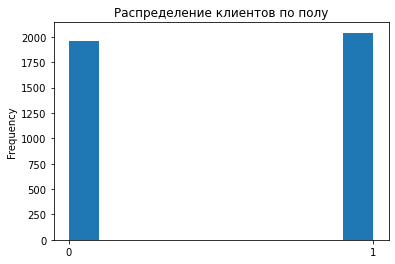

In [22]:
# Наглядно представим на диаграмме

data['Gender'].plot(kind = "hist", xlabel = 'Gender', title = 'Распределение клиентов по полу')
plt.xticks([0, 1])

In [24]:
# Подсчет уникальных значений в столбце Near_Location
len(data['Near_Location'].unique())

2

Два уникальных значения в поле 'Near_Location' 0 или 1 в зависиомсти от того проживает/работает клиент в районе, где находится фитнес 

In [148]:
count_location_1 = len(data[data['Near_Location'] == 1])
count_location_0 = len(data[data['Near_Location'] == 0])
    
    
print ('Количество клиентов проживающих 1:', count_location_1, '\nКоличество клиентов проживающих 0:', count_location_0)   

Количество клиентов проживающих 1: 3381 
Количество клиентов проживающих 0: 619


In [156]:
df = data[['Near_Location', 'Gender']].groupby(['Near_Location']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Near_Location,Count
0,0,619
1,1,3381


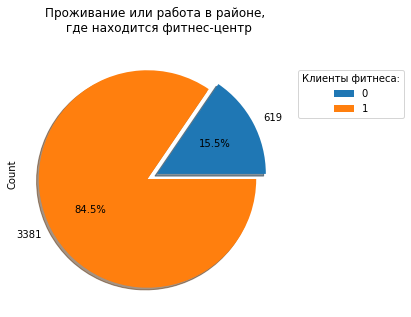

In [176]:
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['0','1'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Проживание или работа в районе, \n где находится фитнес-центр")
plt.show()

85% -это клиенты, которые живут или работают рядом с фитнесом

In [177]:
df = data[['Partner', 'Gender']].groupby(['Partner']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Partner,Count
0,0,2053
1,1,1947


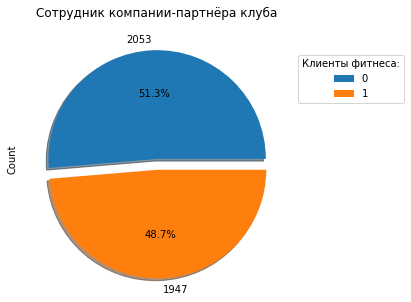

In [179]:
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['0','1'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Cотрудник компании-партнёра клуба")
plt.show()

Чуть меньше половины (49%) являются сотрудниками компаний-партнеров фитнес-клуба 

In [180]:
df = data[['Promo_friends', 'Gender']].groupby(['Promo_friends']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Promo_friends,Count
0,0,2766
1,1,1234


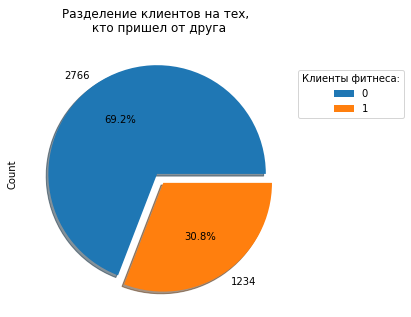

In [182]:
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['0','1'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Разделение клиентов на тех, \n кто пришел от друга")
plt.show()

31% клиентов первоначально пришел по акции "приведи друга"

([<matplotlib.axis.XTick at 0x7fbab39009d0>,
 [Text(0, 0, ''), Text(0, 0, '')])

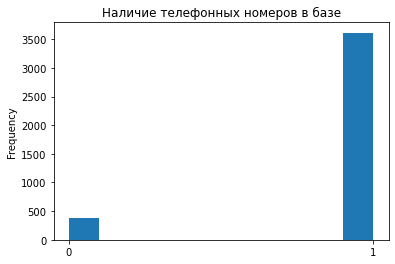

In [188]:
data['Phone'].plot(kind = "hist", xlabel = 'phone',  title = 'Наличие телефонных номеров в базе')
plt.xticks([0, 1])

У 90% клиентов известен номер телефона

In [207]:
# медиана длительности текущего абонемента
data['Contract_period'].median()

1.0

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Contract_period', ylabel='Density'>

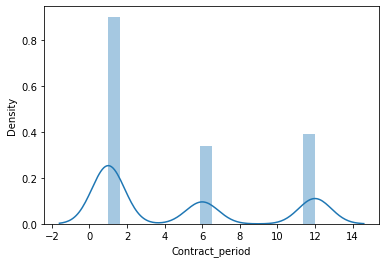

In [197]:
### Распределение длительности текущего абонемента
sns.distplot(data.Contract_period)

In [202]:
df = data[['Contract_period', 'Gender']].groupby(['Contract_period']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Contract_period,Count
0,1,2207
1,6,833
2,12,960


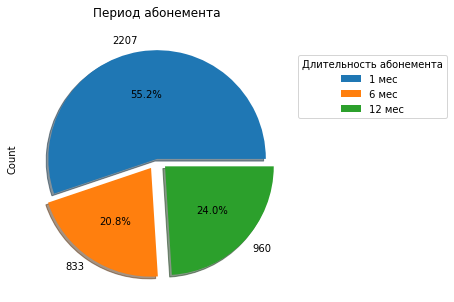

In [206]:
explode = (0, 0.1, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['1 мес','6 мес', '12 мес'], title = "Длительность абонемента", bbox_to_anchor=(1, 0.9))
plt.title("Период абонемента")
plt.show()

У 55% клиентов длительность действующего абонемента составляет 1 месяц, у 21% - 6 месяцев и у 24% - 12 месяцев 

In [210]:
df = data[['Group_visits', 'Gender']].groupby(['Group_visits']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Group_visits,Count
0,0,2351
1,1,1649


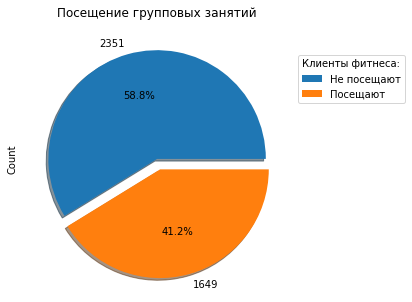

In [212]:
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['Не посещают','Посещают'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Посещение групповых занятий")
plt.show()

41% клиентов посещают групповые занятия

In [216]:
df = data[['Age', 'Gender']].groupby(['Age']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Age,Count
0,18,2
1,19,2
2,20,14
3,21,24
4,22,33
5,23,82
6,24,148
7,25,231
8,26,300
9,27,378


/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

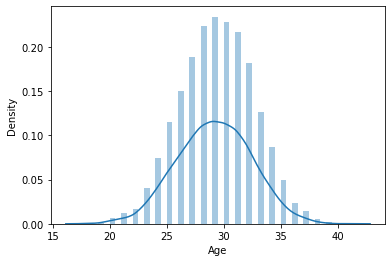

In [217]:
sns.distplot(data.Age)

Распределение клиентов по возрасту похоже на нормальное.
Значит среднее значение, медиана и мода будут приблизительно одинаковы.

In [218]:
# медиана длительности текущего абонемента
data['Age'].median()

29.0

In [219]:
#среднее арифметическое
data['Age'].mean()

29.18425

In [220]:
# мода
data['Age'].mode()

0    29
dtype: int64

In [280]:
df = data[['Churn', 'Gender']].groupby(['Churn']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Churn,Count
0,0,2939
1,1,1061


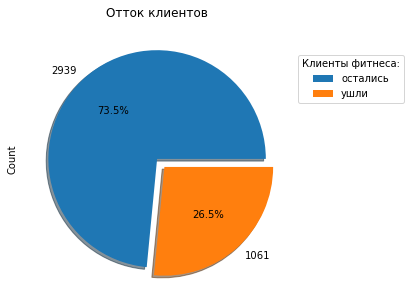

In [282]:
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['остались','ушли'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Отток клиентов")
plt.show()

Отток клиентов составил 27% 

In [369]:
df = data[['Lifetime', 'Gender']].groupby(['Lifetime']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()

,Lifetime,Count
0,0,487
1,1,843
2,2,610
3,3,490
4,4,383
5,5,273
6,6,220
7,7,167
8,8,111
9,9,100


/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Lifetime', ylabel='Density'>

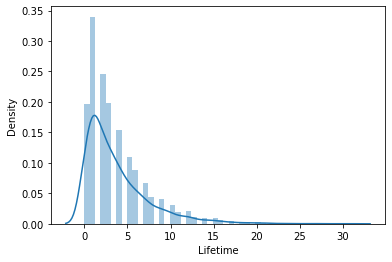

In [370]:
sns.distplot(data.Lifetime)

In [371]:
среднее

3.72475

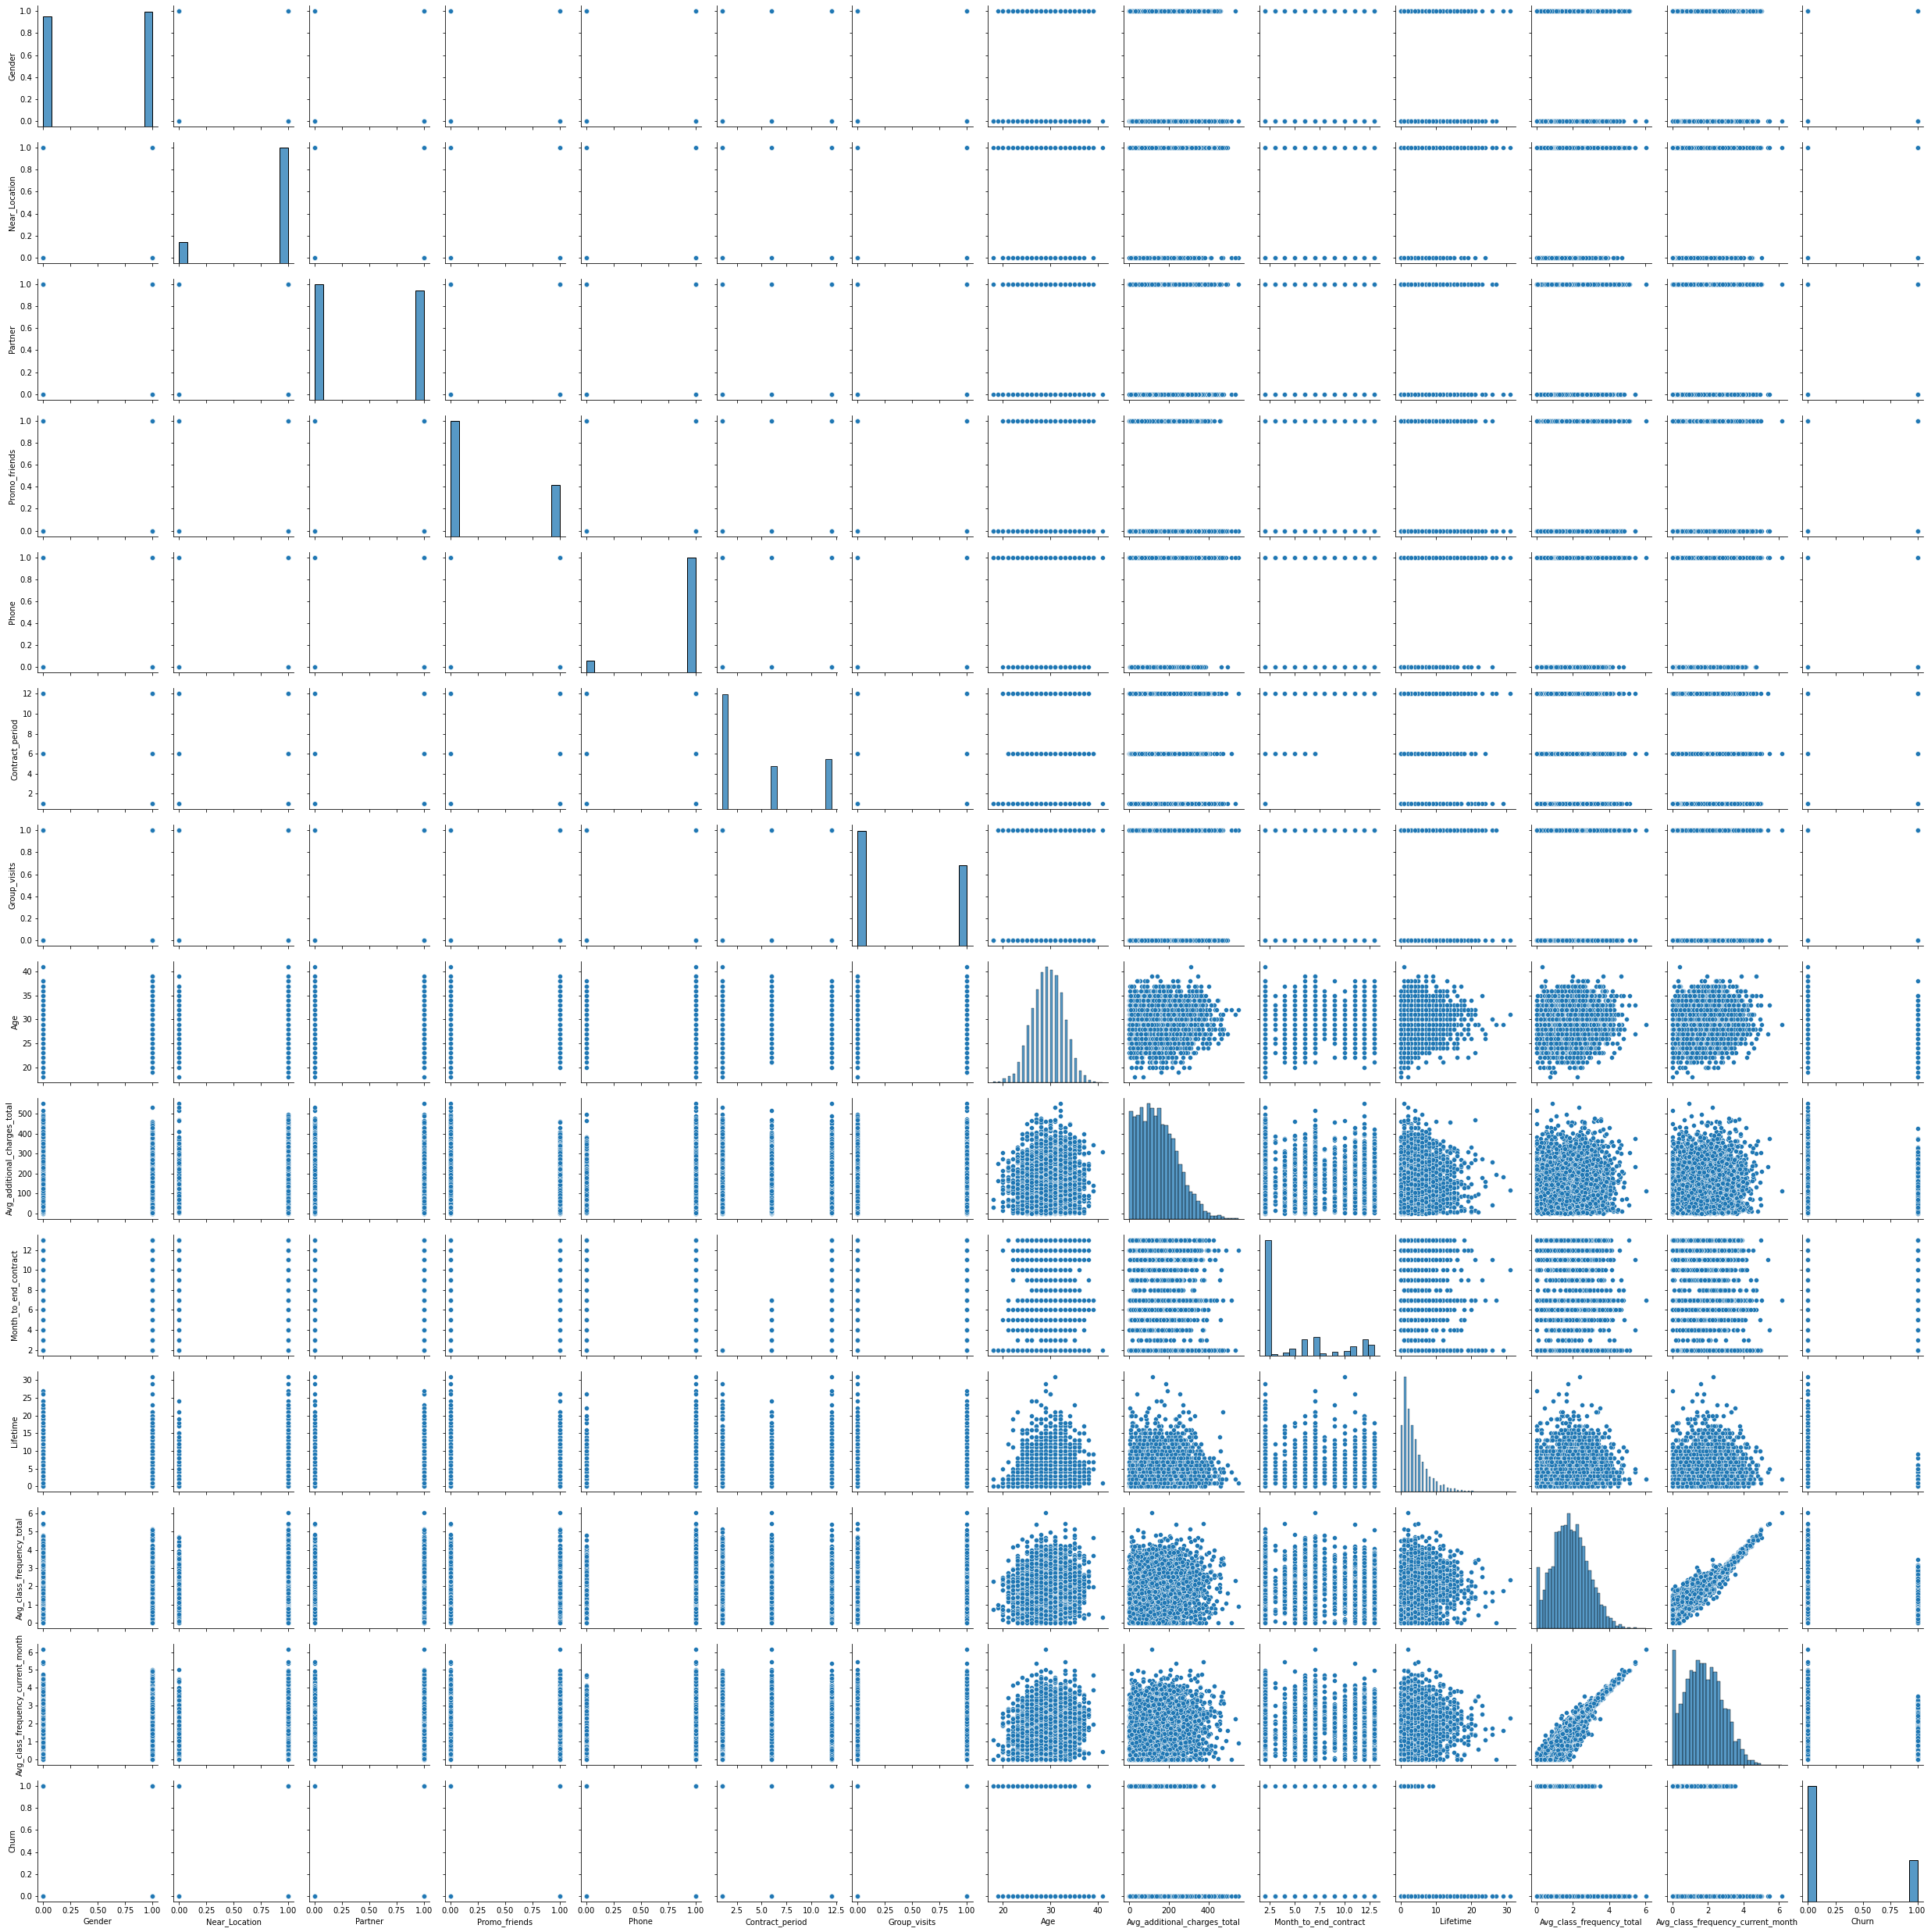

In [382]:
#scatter plot matrix с помощью этой визуализации на глаз оцениваю корреляции между различными признаками
sns.pairplot(data)

Визуально выбираю и отдельно рассматриваю графики с возможной корреляцией

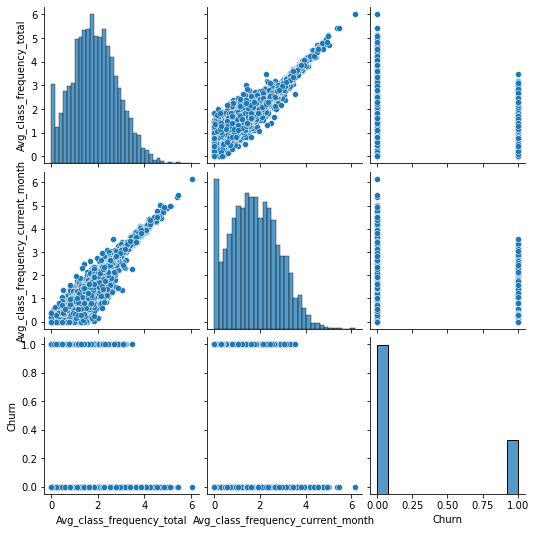

In [384]:
sns.pairplot(data[['Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']])

<function matplotlib.pyplot.show(close=None, block=None)>

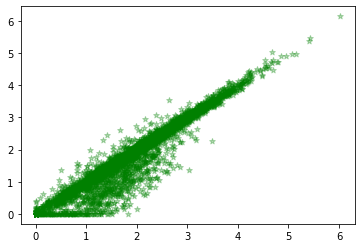

In [398]:
plt.scatter(data['Avg_class_frequency_total'], data['Avg_class_frequency_current_month'],
            color = 'green', alpha = 0.3, marker = '*' )
plt.show

Корреляция средней частоты посещений в неделю за все время с начала действия абонемента (Avg_class_frequency_total) и средней частоты  посещений в неделю за предыдущий месяц (Avg_class_frequency_current_month) неинформативна, поскольку очевидна и не дает данных для гипотез. 

<AxesSubplot:title={'center':'dfsf'}>

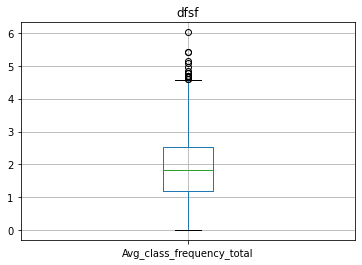

In [403]:
data['Avg_class_frequency_total'].plot(kind = 'box', title = 'dfsf', grid = True)


Средняя частота посещений  в неделю составляет около 2 раз, при этом распределение со смещением влево, что подтверждается гистограммой ниже. 

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_class_frequency_total', ylabel='Density'>

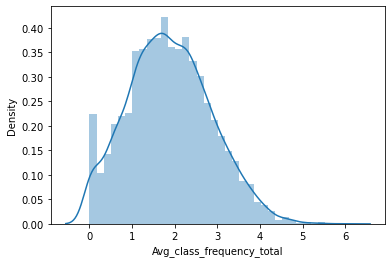

In [404]:
sns.distplot(data.Avg_class_frequency_total)

Можно сделать вывод, что со стабильностью посещений все нормально, учитывая то, что выбросы не у нуля. 

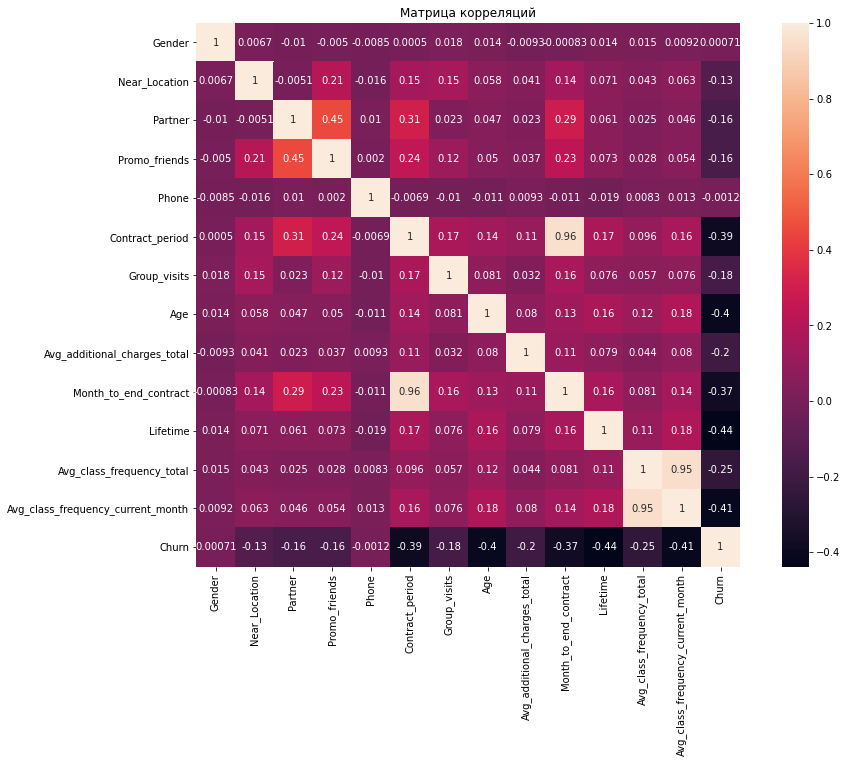

In [407]:
#матрица корреляций

plt.figure(figsize=(15,10))
sns.heatmap(data = data.corr(), annot=True, square=True)
plt.title('Матрица корреляций')
plt.show()


Визуальный анализ тепловой карты не показал очевидной зависимости факта оттока от признаков. 
Между признаками прослеживается слабая линейная связь. 
Корреляционная зависимость прослеживается у следующих признаков: 
- Month_to_end_contract и Contract_period (сильная зависисмоть - 0,96);
- Promo_friends и Partner (слабая зависимость - 0,45). 

Далее визуально сравниваем показатели между двумя группами клиентов: в оттоке и оставшиеся. 

In [429]:
def feat_hist(x, group_col, key_cols):
    x_new = x.copy()
    x_new[key_cols] = data[key_cols]
    for c in key_cols:
        for cl in x[group_col].unique():
            sns.distplot(x_new[x_new[group_col]==cl][c], 
                         label='{} = {}'.format(group_col, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


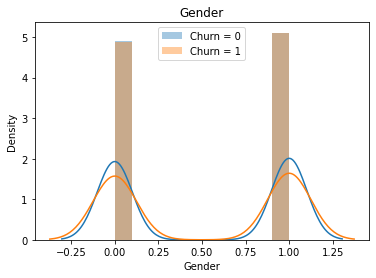

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


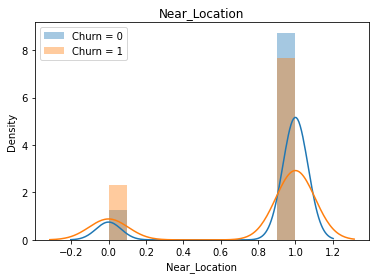

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


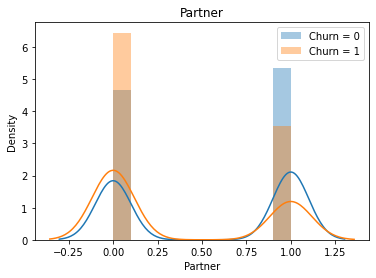

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


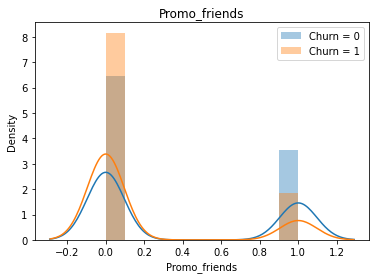

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


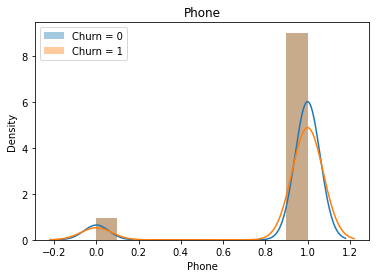

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


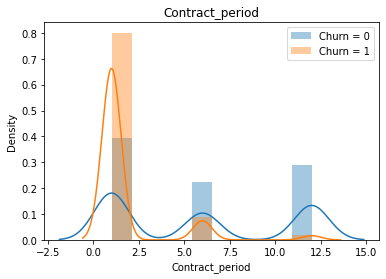

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


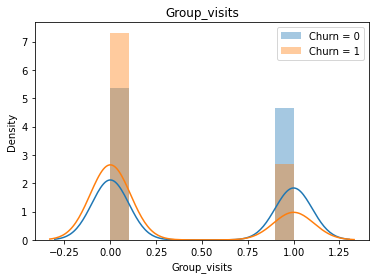

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


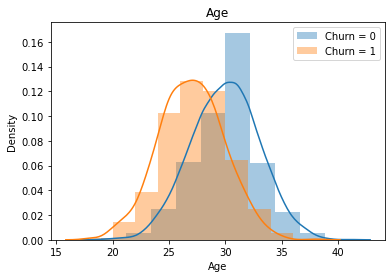

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


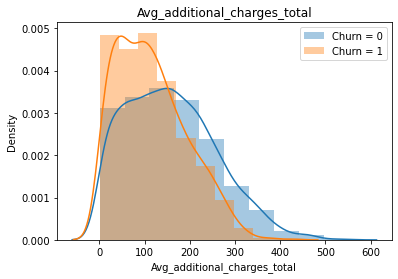

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


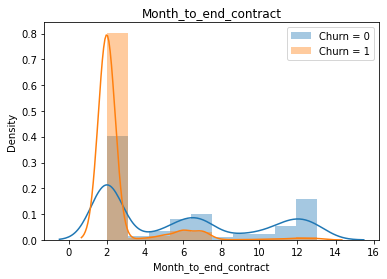

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


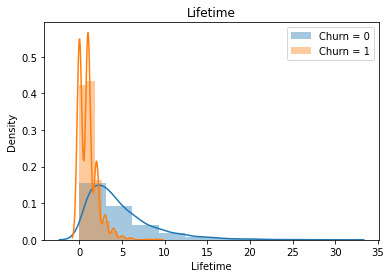

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


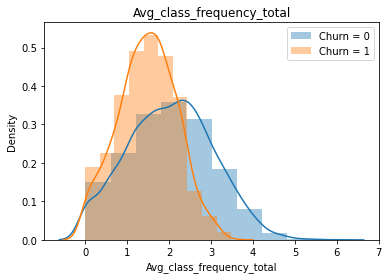

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


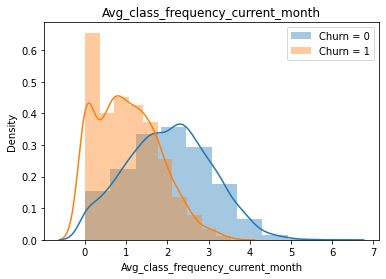

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py

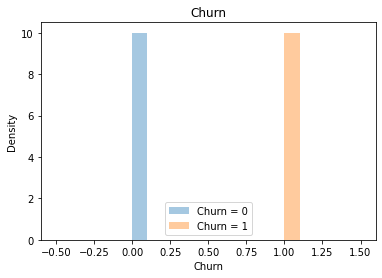

In [432]:
feat_hist(data, 'Churn', data.columns)

Распределение клиентов по полу среди оставшихся и в оттоке не отличается. 
В отток попадает больше клиентов, живущих или работающих в другом районе. 
Клиенты компаний-партнеров фитнес-центра реже попадают в отток. 
Клиенты, пришедшие по промокодам от знакомых, в два раза реже попадают в отток. 
Наличие контактного телефона в базе не влияет на отток. 
Большая часть клиентов в оттоке с длительностью абонемента 1-2 месяца. Следовательно, срок окончания абонемента будет выше у клиентов, которые остались.     
Клиенты, попавшие в отток, реже посещали групповые занятия. 
Средний возраст клиентов, попавших в отток, 26 лет. Средний возраст оставшихся клиентов - 31 год. 
Средняя суммарная выручка от дополнительных услуг выше от клиентов, которые остались. 
Средняя частота посещений в неделю больше у оставшихся клиентов. 

### Построение моделей: а) модель прогноза оттока в следующем месяце. Тут нужно апробировать несколько моделей, реализовать перебор параметров моделей , выбрать лучшую.

# Модель логистической  регрессии 
LogisticRegression

In [514]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [515]:
data.columns

Index(['Gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [516]:
# разделяем на X и y

X = data [['Gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]

y = data ['Churn']

In [517]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    1
3997    0
3998    0
3999    0
Name: Churn, Length: 4000, dtype: int64

In [518]:
#    Делим данные на 70% тренировочных и 30%  тестовых

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)   ### random_state=42 - случайное разбиение

In [519]:
X_test

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
555,1,1,0,0,1,6,1,37,205.631751,5,2,1.400690,1.614663
3491,0,0,0,0,1,6,0,27,137.370917,7,24,0.918920,1.093414
527,1,1,0,0,1,1,1,25,41.607768,2,1,2.893104,2.813602
3925,1,0,0,0,1,1,0,31,9.593524,2,14,2.131718,2.147013
2989,1,1,0,0,0,1,0,30,275.271537,2,4,1.653789,1.738444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,1,1,1,1,1,6,0,31,104.266648,4,15,1.712596,1.730650
226,1,1,1,0,1,1,1,32,207.166209,2,3,2.954808,2.969611
1612,0,1,1,1,1,12,0,32,168.020411,10,1,2.825922,2.881917
535,1,1,0,0,1,6,0,26,157.489161,7,2,1.685869,1.697737


In [849]:
# Создаем модель логистической регрессии 

model = LogisticRegression()
model.fit(X_train, y_train)  # метод обучается на данных  для тренировки и подбирает оптимальные коэффициенты

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [850]:
# Предсказываем y_pred (отток)

y_pred = model.predict(X_test)      
y_pred



array([0, 0, 1, ..., 0, 0, 0])

In [851]:
# сравниваем прогнозы с фактом

res_data = X_test.copy()

res_data['y_pred'] = y_pred
res_data['y_test'] = y_test
res_data.head(10)

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,y_pred,y_test
555,1,1,0,0,1,6,1,37,205.631751,5,2,1.400690,1.614663,0,0
3491,0,0,0,0,1,6,0,27,137.370917,7,24,0.918920,1.093414,0,0
527,1,1,0,0,1,1,1,25,41.607768,2,1,2.893104,2.813602,1,0
3925,1,0,0,0,1,1,0,31,9.593524,2,14,2.131718,2.147013,0,0
2989,1,1,0,0,0,1,0,30,275.271537,2,4,1.653789,1.738444,0,0
70,1,1,1,0,0,1,0,27,228.071951,2,0,1.719377,1.340514,1,1
1756,1,1,0,0,1,1,1,30,456.861001,2,2,1.937277,2.011021,0,0
211,1,1,0,0,1,1,1,25,139.984692,2,0,2.375718,1.831002,1,1
196,1,1,1,1,1,12,1,33,235.639765,9,6,1.538506,1.617701,0,0
803,1,0,0,0,1,1,1,23,125.351341,2,1,1.570469,1.293557,1,1


Для оценки производительности модели строим матрицу ошибок

In [852]:
# загружаем из библиотеки функцию для построения

from sklearn.metrics import confusion_matrix  

In [853]:
# строим матрицу

confusion_matrix(y_test, y_pred)

array([[869,  28],
       [ 61, 242]])

In [854]:
# визуализируем матрицу с помощью тепловой карты

from sklearn.metrics import ConfusionMatrixDisplay

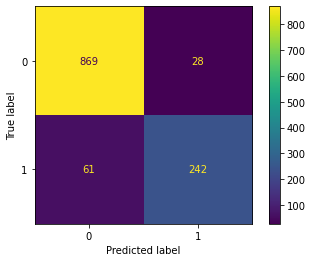

In [855]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

Полученные данные говорят о том, что у нас 869+242  - правильных прогнозов (из них 242 попадут в отток, а 869 останутся) и 61+28  - ошибочных 

На основе матрицы ошибок можно рассчитать следующие метрики: 
- Precision показывает, насколько можно "доверять" модели, если она показала класс 1
- Recall показывает, как хорошо модель умеет находить класс 1;
- f1 - гармоническое среднее между точностью и полнотой.

In [865]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Precision: 0.8962962962962963
Recall: 0.7986798679867987
F1 score: 0.8446771378708551


Максимальное значение F1 может быть =1, что говорит об идеальной модели. 
Для нашей модели F1 получилось около 0.8, что тоже очень неплохо 

In [857]:
# импорт модуля для подбора гиперпараметров

from sklearn.model_selection import GridSearchCV


In [858]:
# словарь с параметрами 

param_grid = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "C": [0.1, 0.5, 1.0, 2.0], 
}

In [866]:
gs_lr = GridSearchCV(model, param_grid, scoring = 'f1_weighted', cv = 3)

In [867]:
gs_lr.fit(X_train, y_train)

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/ponchy/opt

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/ponchy/opt

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1.0, 2.0],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1_weighted')

In [868]:
# лучшие параметры

gs_lr.best_params_

{'C': 0.1, 'penalty': 'none'}

In [869]:
gs_lr.best_estimator_

LogisticRegression(C=0.1, penalty='none')

In [870]:
gs_lr.best_score_

0.9234554551328357

# Модель случайного леса 

# RandomForestClassifier

In [871]:
from sklearn.ensemble import RandomForestClassifier

In [872]:
model_f = RandomForestClassifier(random_state=42)

In [873]:
model_f.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [874]:
y_pred_f = model_f.predict(X_test)


In [877]:
# сравниваем прогнозы с фактом

res_data = X_test.copy()

res_data['y_pred_f'] = y_pred_f
res_data['y_test'] = y_test
res_data.head(10)

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,y_pred_f,y_test
555,1,1,0,0,1,6,1,37,205.631751,5,2,1.400690,1.614663,0,0
3491,0,0,0,0,1,6,0,27,137.370917,7,24,0.918920,1.093414,0,0
527,1,1,0,0,1,1,1,25,41.607768,2,1,2.893104,2.813602,0,0
3925,1,0,0,0,1,1,0,31,9.593524,2,14,2.131718,2.147013,0,0
2989,1,1,0,0,0,1,0,30,275.271537,2,4,1.653789,1.738444,0,0
70,1,1,1,0,0,1,0,27,228.071951,2,0,1.719377,1.340514,1,1
1756,1,1,0,0,1,1,1,30,456.861001,2,2,1.937277,2.011021,0,0
211,1,1,0,0,1,1,1,25,139.984692,2,0,2.375718,1.831002,1,1
196,1,1,1,1,1,12,1,33,235.639765,9,6,1.538506,1.617701,0,0
803,1,0,0,0,1,1,1,23,125.351341,2,1,1.570469,1.293557,1,1


In [878]:


confusion_matrix(y_test, y_pred_f)

array([[856,  41],
       [ 63, 240]])

In [879]:
print('Precision:', precision_score(y_test, y_pred_f))
print('Recall:', recall_score(y_test, y_pred_f))
print('F1 score:', f1_score(y_test, y_pred_f))

Precision: 0.8540925266903915
Recall: 0.7920792079207921
F1 score: 0.821917808219178


In [ ]:
# метрики получились чуть хуже, чем у модели лнейной регрессии 

In [608]:
# GridSearchCV   
# мы указываем диапазон значений, GridSearch перебором находит наилучший набор настроек модели.  

In [880]:
param_grid = {
    "n_estimators": [50, 100, 400],
    "min_samples_split": [2, 5, 10], 
    "max_depth": [1, 2, 5, 10], 
    "min_samples_leaf": [1, 2, 5, 10]
}

In [884]:
gs_f = GridSearchCV(model_f, param_grid, scoring = 'f1_weighted', cv = 3)

In [885]:
y_train

3215    0
3126    0
697     0
3613    1
2374    0
       ..
1130    0
1294    1
860     1
3507    0
3174    1
Name: Churn, Length: 2800, dtype: int64

In [886]:
gs_f.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 5, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 400]},
             scoring='f1_weighted')

In [887]:
# наилучшие параметры для модели 

gs_f.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [888]:
gs_f.best_estimator_

RandomForestClassifier(max_depth=10, random_state=42)

In [889]:
gs_f.best_score_

0.9169962308917806

# Модель дерева решений DecisionTreeClassifier

In [890]:
# импорт модуля

from sklearn.tree import DecisionTreeClassifier

In [891]:
model_t = DecisionTreeClassifier(random_state = 42)

In [892]:
model_t.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [893]:
y_pred_t = model_t.predict(X_test)
y_pred_t

array([0, 0, 0, ..., 0, 0, 0])

In [894]:
# сравниваем прогнозы с фактом

res_data = X_test.copy()

res_data['y_pred_t'] = y_pred_t
res_data['y_test'] = y_test
res_data.head(10)

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,y_pred_t,y_test
555,1,1,0,0,1,6,1,37,205.631751,5,2,1.400690,1.614663,0,0
3491,0,0,0,0,1,6,0,27,137.370917,7,24,0.918920,1.093414,0,0
527,1,1,0,0,1,1,1,25,41.607768,2,1,2.893104,2.813602,0,0
3925,1,0,0,0,1,1,0,31,9.593524,2,14,2.131718,2.147013,0,0
2989,1,1,0,0,0,1,0,30,275.271537,2,4,1.653789,1.738444,0,0
70,1,1,1,0,0,1,0,27,228.071951,2,0,1.719377,1.340514,1,1
1756,1,1,0,0,1,1,1,30,456.861001,2,2,1.937277,2.011021,0,0
211,1,1,0,0,1,1,1,25,139.984692,2,0,2.375718,1.831002,1,1
196,1,1,1,1,1,12,1,33,235.639765,9,6,1.538506,1.617701,0,0
803,1,0,0,0,1,1,1,23,125.351341,2,1,1.570469,1.293557,1,1


In [895]:
confusion_matrix(y_test, y_pred_t)

array([[828,  69],
       [ 67, 236]])

In [896]:
print('Precision:', precision_score(y_test, y_pred_t))
print('Recall:', recall_score(y_test, y_pred_t))
print('F1 score:', f1_score(y_test, y_pred_t))

Precision: 0.7737704918032787
Recall: 0.7788778877887789
F1 score: 0.7763157894736842


In [ ]:
# метрики получились хуже, чем у модели линейной регрессии и модели случайного леса

In [897]:
# словарь параметров

param_grid = {   
    "min_samples_split": [2, 5, 10], 
    "max_depth": [1, 2, 5, 10], 
    "min_samples_leaf": [1, 2, 5, 10]
}

In [898]:
gs_t = GridSearchCV(model_t, param_grid, scoring = 'f1_weighted', cv = 3)

In [899]:
gs_t.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 5, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_weighted')

In [900]:
# наилучшие параметры для модели 

gs_t.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [901]:
gs_t.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [921]:
gs_t.best_score_

0.9006623315828595

### Модель  EXtreme Gradient Boosting

In [902]:
import xgboost as xgb
from xgboost import XGBClassifier

In [903]:
model_exgb = XGBClassifier()

In [904]:
model_exgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [905]:
y_pred_exgb = model_exgb.predict(X_test)
y_pred_exgb

array([0, 0, 1, ..., 0, 0, 0])

In [906]:
# сравниваем прогнозы с фактом

res_data = X_test.copy()

res_data['y_pred_exgb'] = y_pred_exgb
res_data['y_test'] = y_test
res_data.head(10)

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,y_pred_exgb,y_test
555,1,1,0,0,1,6,1,37,205.631751,5,2,1.400690,1.614663,0,0
3491,0,0,0,0,1,6,0,27,137.370917,7,24,0.918920,1.093414,0,0
527,1,1,0,0,1,1,1,25,41.607768,2,1,2.893104,2.813602,1,0
3925,1,0,0,0,1,1,0,31,9.593524,2,14,2.131718,2.147013,0,0
2989,1,1,0,0,0,1,0,30,275.271537,2,4,1.653789,1.738444,0,0
70,1,1,1,0,0,1,0,27,228.071951,2,0,1.719377,1.340514,1,1
1756,1,1,0,0,1,1,1,30,456.861001,2,2,1.937277,2.011021,0,0
211,1,1,0,0,1,1,1,25,139.984692,2,0,2.375718,1.831002,1,1
196,1,1,1,1,1,12,1,33,235.639765,9,6,1.538506,1.617701,0,0
803,1,0,0,0,1,1,1,23,125.351341,2,1,1.570469,1.293557,1,1


In [907]:
confusion_matrix(y_test, y_pred_exgb)

array([[861,  36],
       [ 48, 255]])

In [908]:
print('Precision:', precision_score(y_test, y_pred_exgb))
print('Recall:', recall_score(y_test, y_pred_exgb))
print('F1 score:', f1_score(y_test, y_pred_exgb))

Precision: 0.8762886597938144
Recall: 0.8415841584158416
F1 score: 0.8585858585858587


In [ ]:
# метрики получились на уровне линейной регрессии 

In [909]:
# словарь параметров

param_grid = {
    "n_estimators": [50, 100, 400],
    "learning_rate": [0.5, 1, 2], 
    "max_depth": [1, 5, 10], 
    "colsample_bytree": [0.8, 1, 2]
}

In [911]:
gs_exgb = GridSearchCV(model_exgb, param_grid, scoring = 'f1_weighted', cv = 3)

In [912]:
gs_exgb.fit(X_train, y_train)

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 1367, in update


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [913]:
# наилучшие параметры для модели 

gs_exgb.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.5,
 'max_depth': 5,
 'n_estimators': 100}

In [918]:
gs_exgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [923]:
a = gs_exgb.best_score_

In [924]:
Cделать красиво один принт!!!  и написать выводы 

print ("Логистическая регрессия:", gs_lr.best_score_)
print ("Случайный лес", gs_f.best_score_)
print ("Дерево решений:", gs_t.best_score_)
print ("XGBoost:", a)

Логистическая регрессия: 0.9234554551328357
Случайный лес 0.9169962308917806
Дерево решений: 0.9006623315828595
XGBoost: 0.9359975182041045


Модель XGBoos показала себя лучше. 

# Построить модель кластеризации клиентов на группы (построение матрицы расстояний, построение нескольких моделей, изучение средних значений признаков в разрезе кластеров)

In [35]:
import scipy.cluster.hierarchy as shc

from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

In [9]:
X = data [['Gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']].values

In [10]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [11]:
# с помощью функции StandardScaler() стандартизуем  значений данных в стандартный формат

scaler = StandardScaler()

In [12]:
X_scaled_tr = scaler.fit_transform(X)

In [16]:
X_scaled_tr

array([[ 0.97970588,  0.42788074,  1.02686062, ..., -0.19332863,
        -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , ...,  0.87368001,
         0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.46008079,
        -0.02049263, -0.02901851],
       ...,
       [ 0.97970588,  0.42788074,  1.02686062, ..., -0.46008079,
         0.93313947,  1.01103141],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.19332863,
        -0.25604937, -0.16225246],
       [ 0.97970588, -2.33709981,  1.02686062, ..., -0.72683295,
        -0.79947418, -0.69509885]])

In [ ]:
# Иерархическая кластеризация

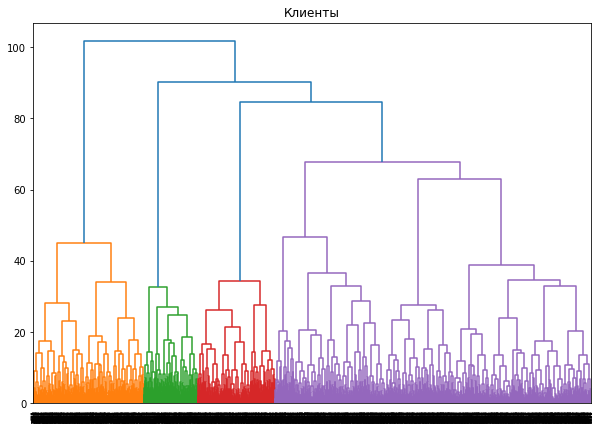

In [36]:
plt.figure(figsize=(10, 7))
plt.title("Клиенты")
dend = shc.dendrogram(shc.linkage(X_scaled_tr, method='ward'))

Получается оптимально разделить клиентов на 4 кластера

In [37]:
# С помощью алгоритма агломеративной кластеризации разделим данные на 4 кластера 

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_scaled_tr)

array([2, 1, 0, ..., 1, 0, 2])

In [38]:
print(cluster.labels_)

[2 1 0 ... 1 0 2]


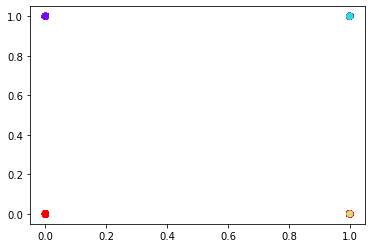

In [39]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

# K-Means Clustering

In [41]:
from sklearn.cluster import KMeans

In [42]:
# используем метод локтя для нахождения нужного количества кластеров
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled_tr)
    wcss.append(kmeans.inertia_)


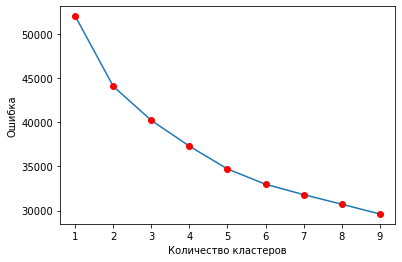

In [43]:
plt.plot(range(1,10), wcss)
plt.plot(range(1,10), wcss ,'ro')
plt.xlabel('Количество кластеров')
plt.ylabel('Ошибка')
plt.show()

In [ ]:
# разбиваем на 5 кластеров

In [44]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled_tr)
y_kmeans

array([1, 2, 4, ..., 2, 2, 1], dtype=int32)